In [1]:
import pandas as pd
import json

fn_result_path = './false_negatives_context.json' 
with open(fn_result_path, 'r') as file:
    data = json.load(file)
    # Convert the loaded JSON data into a pandas DataFrame
    fn_df = pd.DataFrame(data)

print(fn_df.head())

                                         true_labels  \
0  [O, O, O, B-NAME_STUDENT, O, B-NAME_STUDENT, O...   
1  [O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, B-ID...   
2  [O, O, O, B-NAME_STUDENT, O, B-ID_NUM, O, O, O...   
3  [B-NAME_STUDENT, I-NAME_STUDENT, O, B-STREET_A...   
4  [B-NAME_STUDENT, I-NAME_STUDENT, O, B-STREET_A...   

                                    predicted_labels  \
0  [O, O, O, B-NAME_STUDENT, O, I-NAME_STUDENT, O...   
1  [O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, I-ID...   
2  [O, O, O, B-NAME_STUDENT, O, I-ID_NUM, O, O, O...   
3  [B-NAME_STUDENT, I-EMAIL, O, I-STREET_ADDRESS,...   
4  [B-NAME_STUDENT, I-EMAIL, O, I-STREET_ADDRESS,...   

                                              tokens  
0  [, CONCLUSION, , Lisa, , Benjamin, , 534516353...  
1  [., , Bikram, Das, , 871483046449, , Never, gi...  
2  [confidence, ., , Maria, , 836172426340, , “, ...  
3      [Waseem, Mabunda, , 591, Smith, Centers, Apt]  
4  [Waseem, Mabunda, , 591, Smith, Centers, Apt, ..

In [10]:
# Flatten the data structure to make it suitable for a DataFrame
flattened_data = []
for entry in data:
    for token, true_label, predicted_label in zip(entry['tokens'], entry['true_labels'], entry['predicted_labels']):
        if true_label != predicted_label:
            flattened_data.append({
                'Token': token,
                'True Label': true_label,
                'Predicted Label': predicted_label
            })

# Convert the list of dictionaries into a DataFrame
discrepancies_df = pd.DataFrame(flattened_data)

# Display the DataFrame
print(discrepancies_df)


                Token        True Label   Predicted Label
0            Benjamin    B-NAME_STUDENT    I-NAME_STUDENT
1        871483046449          B-ID_NUM          I-ID_NUM
2        836172426340          B-ID_NUM          I-ID_NUM
3             Mabunda    I-NAME_STUDENT           I-EMAIL
4                 591  B-STREET_ADDRESS  I-STREET_ADDRESS
..                ...               ...               ...
67            320)202       I-PHONE_NUM  I-STREET_ADDRESS
68                  -       I-PHONE_NUM  I-STREET_ADDRESS
69         0688x95843       I-PHONE_NUM  I-STREET_ADDRESS
70  hwillis@gmail.com           B-EMAIL  I-STREET_ADDRESS
71           Galletti    I-NAME_STUDENT           I-EMAIL

[72 rows x 3 columns]


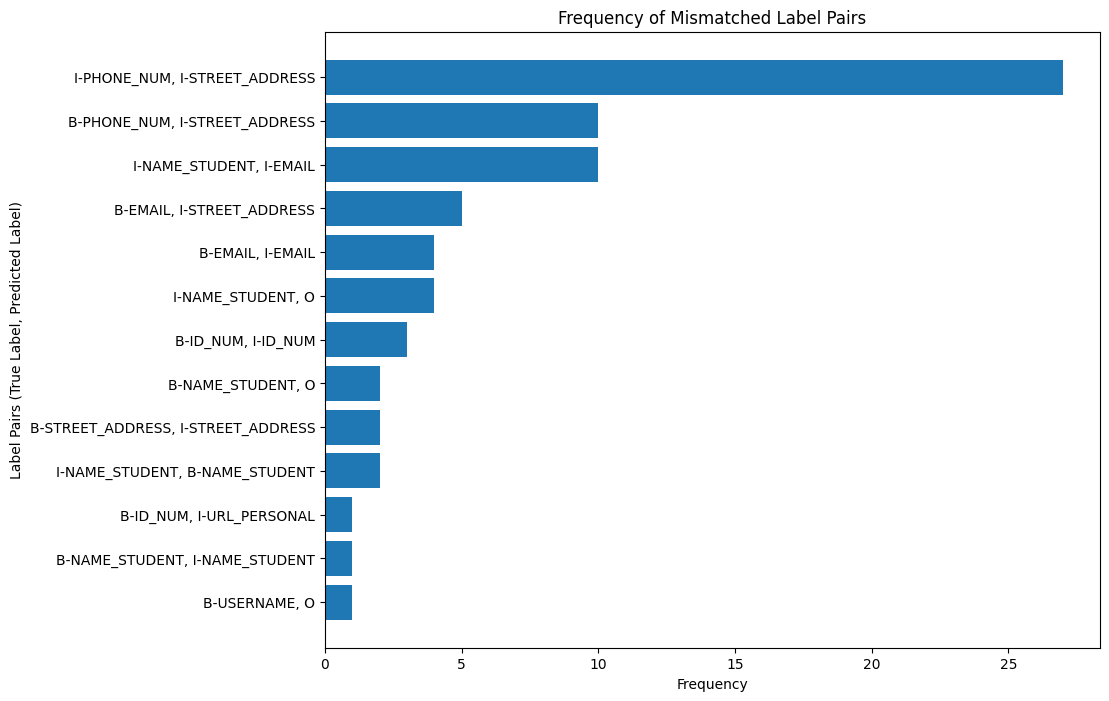

In [11]:

import matplotlib.pyplot as plt
# Group by True Label and Predicted Label to count frequencies
label_pairs = discrepancies_df.groupby(['True Label', 'Predicted Label']).size().reset_index(name='Frequency')

# Sort by frequency for better visualization
label_pairs = label_pairs.sort_values(by='Frequency', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(label_pairs['True Label'] + ", " + label_pairs['Predicted Label'], label_pairs['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Label Pairs (True Label, Predicted Label)')
plt.title('Frequency of Mismatched Label Pairs')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequencies at the top
plt.show()